# plot "local-LNC" relationships using HCP

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np
import pickle
import pandas as pd
import sys
code_dir = '/home/nblauch/git/imaging_neuro'
sys.path.append(code_dir)
from func.hcp_plotting_funs import get_roi_from_atlas, plot_pairwise_corrs_all_rois
from func.hcp import get_subs_by_handedness, ROIS_DICT

/home/nblauch/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
handedness='R'
hand_thresh = 40
all_sums = {'R': {}}

for exp in ['WM', 'EMOTION']:
    with open(f'{code_dir}/data/hcp_atlas_selectivity/{exp}_HCPMMP1.pkl', 'rb') as f:
        these_sums, inds = pickle.load(f)

    # filter by handedness
    subjects, sub_inds = get_subs_by_handedness(handedness, hand_thresh)
    all_sums[handedness][exp] = {key: pd.DataFrame(data=val[sub_inds], index=subjects, columns=inds) for key, val in these_sums.items()}

/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:186: RuntimeWarning: invalid value encountered in true_divide
  target_map = (target_map[good_subs,:180]- target_map[good_subs,180:])/(target_map[good_subs,180:] + target_map[good_subs,:180])
/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:187: RuntimeWarning: invalid value encountered in true_divide
  roi_map = (roi_map[good_subs,:180]- roi_map[good_subs,180:])/(roi_map[good_subs,180:] + roi_map[good_subs,:180])


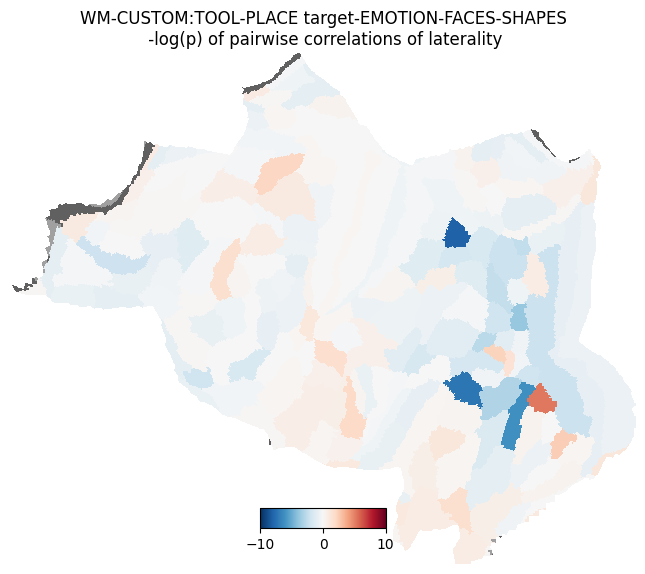

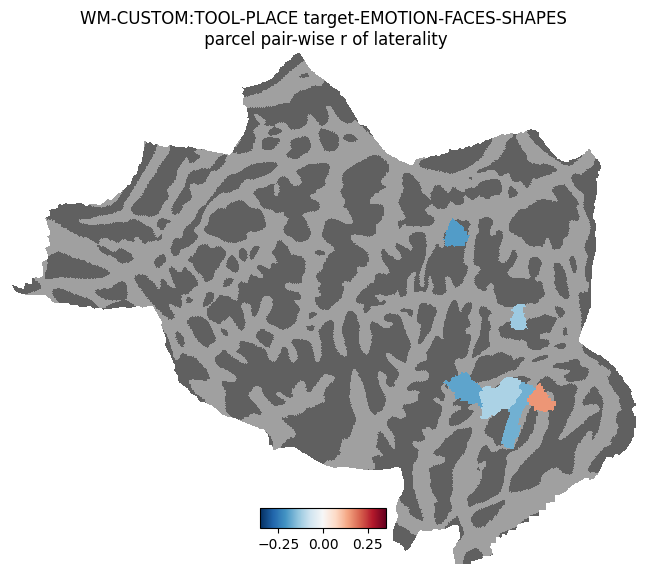

/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:186: RuntimeWarning: invalid value encountered in true_divide
  target_map = (target_map[good_subs,:180]- target_map[good_subs,180:])/(target_map[good_subs,180:] + target_map[good_subs,:180])
/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:187: RuntimeWarning: invalid value encountered in true_divide
  roi_map = (roi_map[good_subs,:180]- roi_map[good_subs,180:])/(roi_map[good_subs,180:] + roi_map[good_subs,:180])


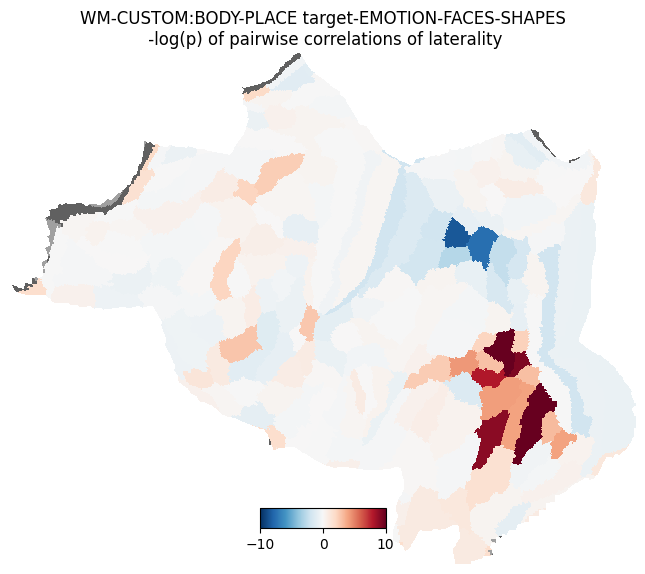

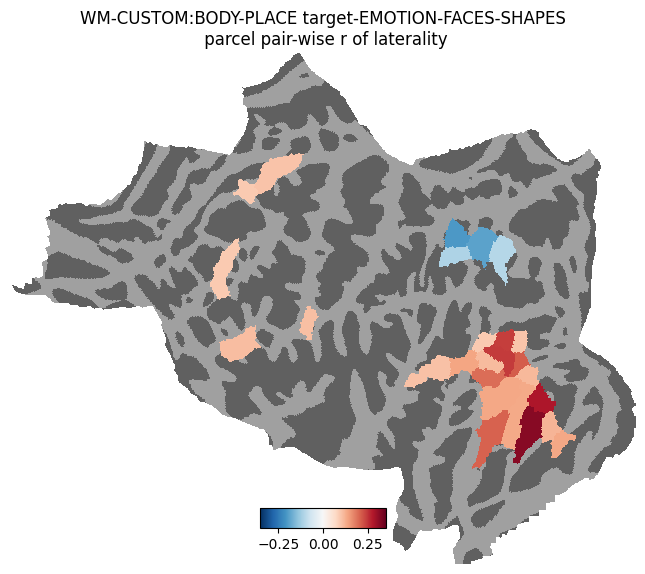

/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:186: RuntimeWarning: invalid value encountered in true_divide
  target_map = (target_map[good_subs,:180]- target_map[good_subs,180:])/(target_map[good_subs,180:] + target_map[good_subs,:180])
/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:187: RuntimeWarning: invalid value encountered in true_divide
  roi_map = (roi_map[good_subs,:180]- roi_map[good_subs,180:])/(roi_map[good_subs,180:] + roi_map[good_subs,:180])


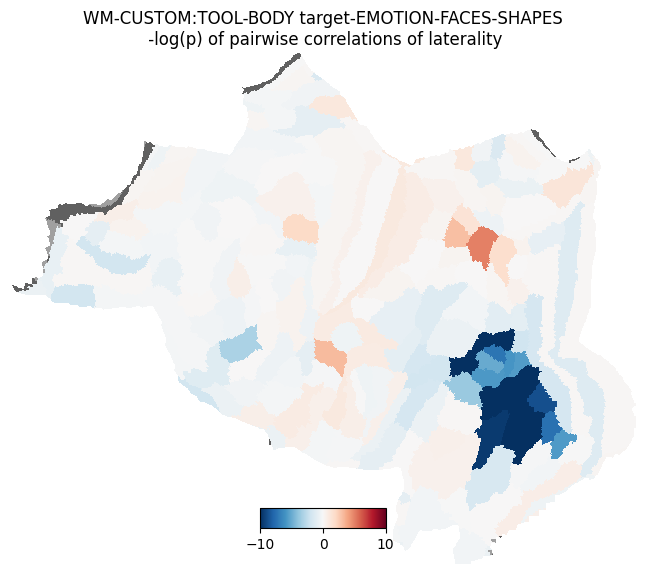

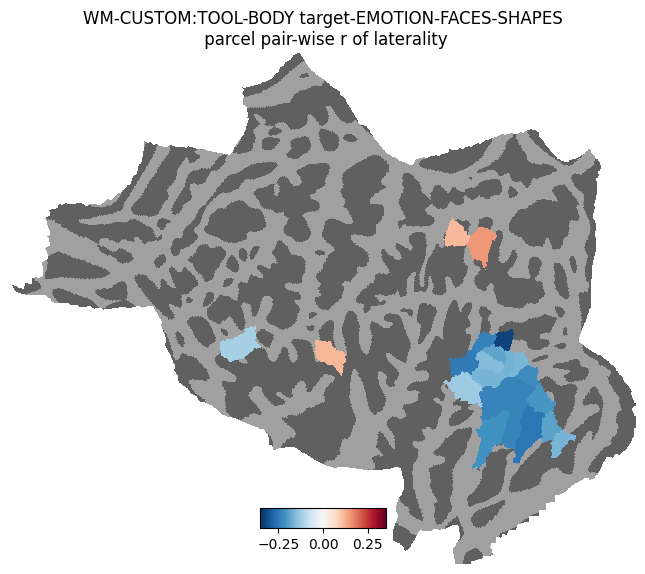

/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:186: RuntimeWarning: invalid value encountered in true_divide
  target_map = (target_map[good_subs,:180]- target_map[good_subs,180:])/(target_map[good_subs,180:] + target_map[good_subs,:180])
/home/nblauch/git/imaging_neuro/func/hcp_plotting_funs.py:187: RuntimeWarning: invalid value encountered in true_divide
  roi_map = (roi_map[good_subs,:180]- roi_map[good_subs,180:])/(roi_map[good_subs,180:] + roi_map[good_subs,:180])


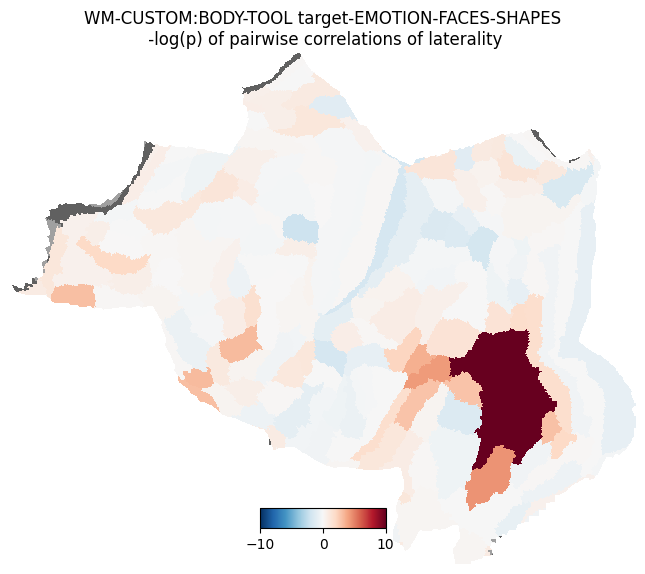

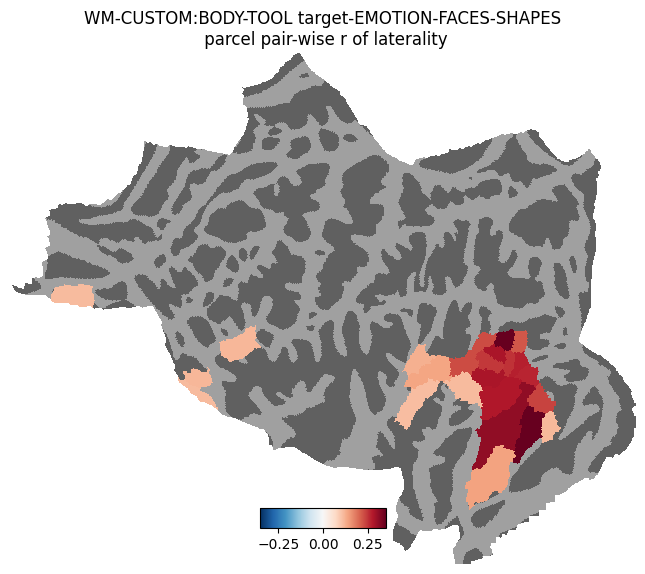

In [3]:
for laterality in [True]:
    plot_pairwise_corrs_all_rois(all_sums, 'WM', 'CUSTOM:TOOL-PLACE', 'EMOTION', 'FACES-SHAPES', laterality=laterality, handedness=handedness, subjects=subjects)
    plot_pairwise_corrs_all_rois(all_sums, 'WM', 'CUSTOM:BODY-PLACE', 'EMOTION', 'FACES-SHAPES', laterality=laterality, handedness=handedness, subjects=subjects)
    plot_pairwise_corrs_all_rois(all_sums, 'WM', 'CUSTOM:TOOL-BODY', 'EMOTION', 'FACES-SHAPES', laterality=laterality, handedness=handedness, subjects=subjects)
    plot_pairwise_corrs_all_rois(all_sums, 'WM', 'CUSTOM:BODY-TOOL', 'EMOTION', 'FACES-SHAPES', laterality=laterality, handedness=handedness, subjects=subjects)

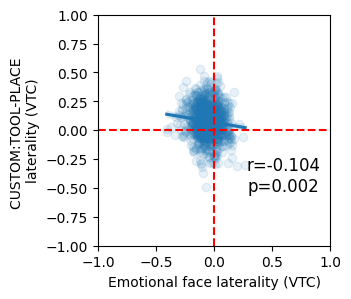

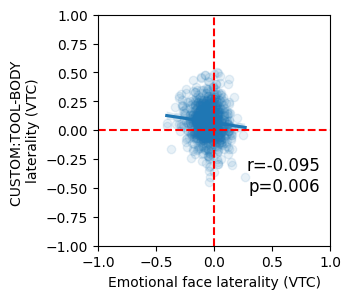

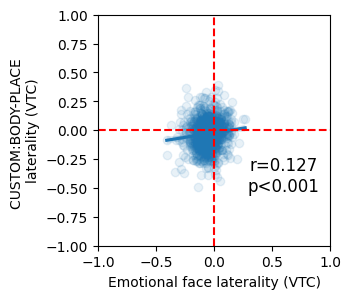

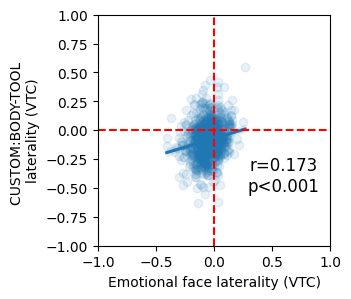

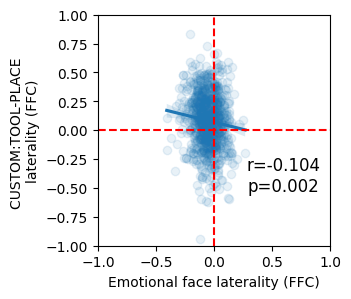

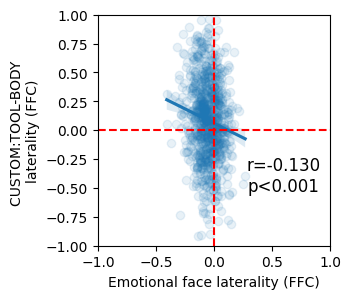

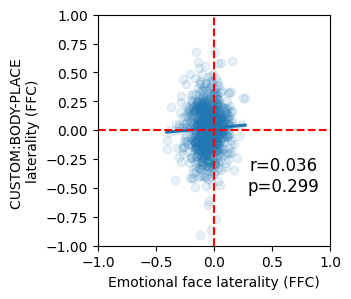

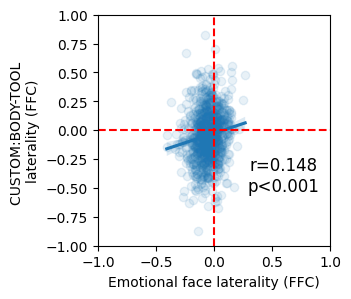

In [4]:
targ_laterality, _ = get_roi_from_atlas(all_sums, 'FACES-SHAPES', 'EMOTION', handedness, ROIS_DICT['VTC'], 'laterality', atlas='HCPMMP1')
for roi, rois in [('VTC', ROIS_DICT['VTC']), ('FFC', ['FFC'])]:
    for seed_map in ['CUSTOM:TOOL-PLACE', 'CUSTOM:TOOL-BODY', 'CUSTOM:BODY-PLACE', 'CUSTOM:BODY-TOOL']:
        seed_laterality, _ = get_roi_from_atlas(all_sums, seed_map, 'WM', handedness, rois, 'laterality', atlas='HCPMMP1')
        r, p = spearmanr(targ_laterality, seed_laterality, nan_policy='omit')
        p_tag = f'p={p:.03f}' if p > 0.001 else 'p<0.001'
        fig = plt.figure(figsize=(3,3))
        sns.regplot(x=targ_laterality, y=seed_laterality, ci=95, scatter_kws=dict(alpha=0.1)) #edgecolor='white', 
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.axhline(0, color='red', linestyle='--')
        plt.axvline(0, color='red', linestyle='--')
        plt.xlabel(f'Emotional face laterality ({roi})')
        plt.ylabel(f'{seed_map} \nlaterality ({roi})')
        plt.title(f'r={r:.03f}\n{p_tag}', y=0.2, x=0.8)
        plt.show()